# Project Title: MalariaNet - Deep Learning for Malaria Image Classification with TensorFlow

#### UMBC Data Science Master Degree Capstone - DATA606

**Guided by:**

Dr. Chaojie (Jay) Wang


### **Data:**
### **Data Source:** [Kaggle - Malaria Cell Images Dataset](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data)
The dataset "Cell Images for Detecting Malaria" contains a collection of images representing blood smears of individuals infected with malaria and uninfected individuals.


### **Author Information:**
* **Name** - Srinivas Naidu Pasyavula

* **University** ID - QC61851
* **Github** - [Srinivas Naidu Pasyavula - Github](https://github.com/PasyavulaSrinivasNaidu/UMBC-DATA606-Capstone/)
* **LinkedIn** - [Srinivas Naidu Pasyavula - LinkedIn](https://www.linkedin.com/in/srinivas-naidu-pasyavula/)
* **Powerpoint Presentation** - [Project Presentation File]()
* **Youtube Video** - [Project Presentation Video]()


---

## **Data Preparation and Loading**

### Installing Dependencies (Libraries and Packages)

In [ ]:
# installing Tensorflow dependencies
!pip install tensorflow
!pip install tensorflow-datasets

In [ ]:
# importing Packages and Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

### Loading Data

In [ ]:
# Loading malaria dataset from tensorflow datasets
dataset_name = 'malaria'
dataset, dataset_info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete0Y80J4/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


## **Dataset Exploration**

In [ ]:
# Explore Dataset Information
print("Dataset Information:")
print(info)

Dataset Information:
tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpndyvvg3ytfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin 

In [ ]:
# Display Number of Samples
num_samples = info.splits['train'].num_examples
print("\nNumber of Samples:", num_samples)


Number of Samples: 27558


In [ ]:
# Display Number of Classes
num_classes = info.features['label'].num_classes
print("Number of Classes:", num_classes)

Number of Classes: 2


In [ ]:
# Display Class Names
class_names = info.features['label'].names
print("Class Names:", class_names)

Class Names: ['parasitized', 'uninfected']


In [ ]:
# Get class names and number of classes
class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

# Count samples in each class
class_counts = [0] * num_classes
for sample in dataset:
    label = sample['label']
    class_counts[label.numpy()] += 1

# Display number of samples in each class
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {class_counts[i]}")

parasitized: 13779
uninfected: 13779



Visualizing Some Samples:


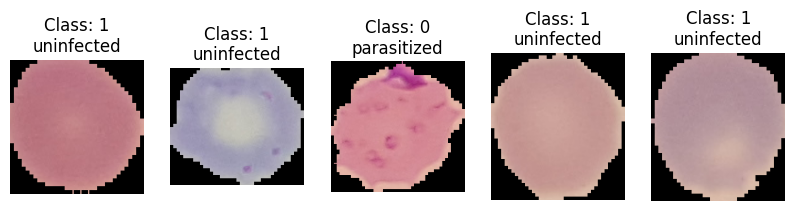

In [ ]:
# Visualize Some Samples
def visualize_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, sample in enumerate(dataset.take(num_samples)):
        image = sample['image']
        label = sample['label']
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Class: {label.numpy()}\n{class_names[label.numpy()]}")
        plt.axis('off')
    plt.show()

print("\nVisualizing Some Samples:")
visualize_samples(dataset)

In [ ]:
# Display Image Shapes and Types
def display_image_shapes_types(dataset):
    for sample in dataset.take(1):
        image = sample['image']
        label = sample['label']
        print("Image Shape:", image.shape)
        print("Image Data Type:", image.dtype)
        print("Label Data Type:", label.dtype)

print("\nDisplaying Image Shapes and Types:")
display_image_shapes_types(dataset)


Displaying Image Shapes and Types:
Image Shape: (103, 103, 3)
Image Data Type: <dtype: 'uint8'>
Label Data Type: <dtype: 'int64'>



Displaying Class Distribution:


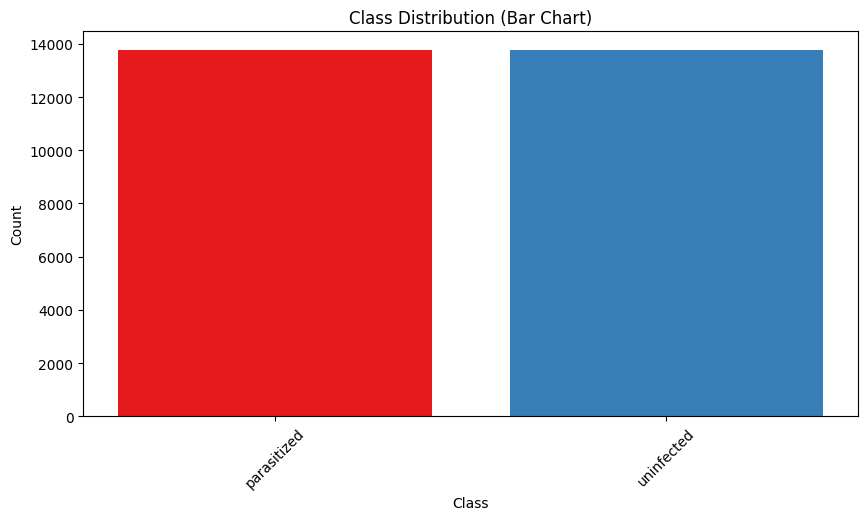

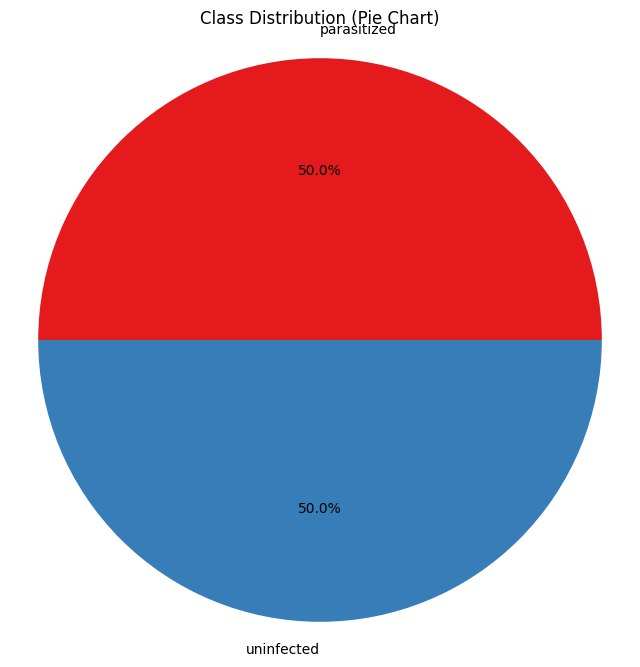

In [ ]:
# Display Class Distribution
def display_class_distribution(dataset):
    class_counts = [0] * num_classes
    for sample in dataset:
        label = sample['label']
        class_counts[label.numpy()] += 1

    # Bar chart with different colors
    colors = plt.cm.Set1(np.arange(len(class_counts)))
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, class_counts, color=colors)
    plt.title('Class Distribution (Bar Chart)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=colors)
    plt.title('Class Distribution (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Get class names and number of classes
class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print("\nDisplaying Class Distribution:")
display_class_distribution(dataset)


Image Statistics:


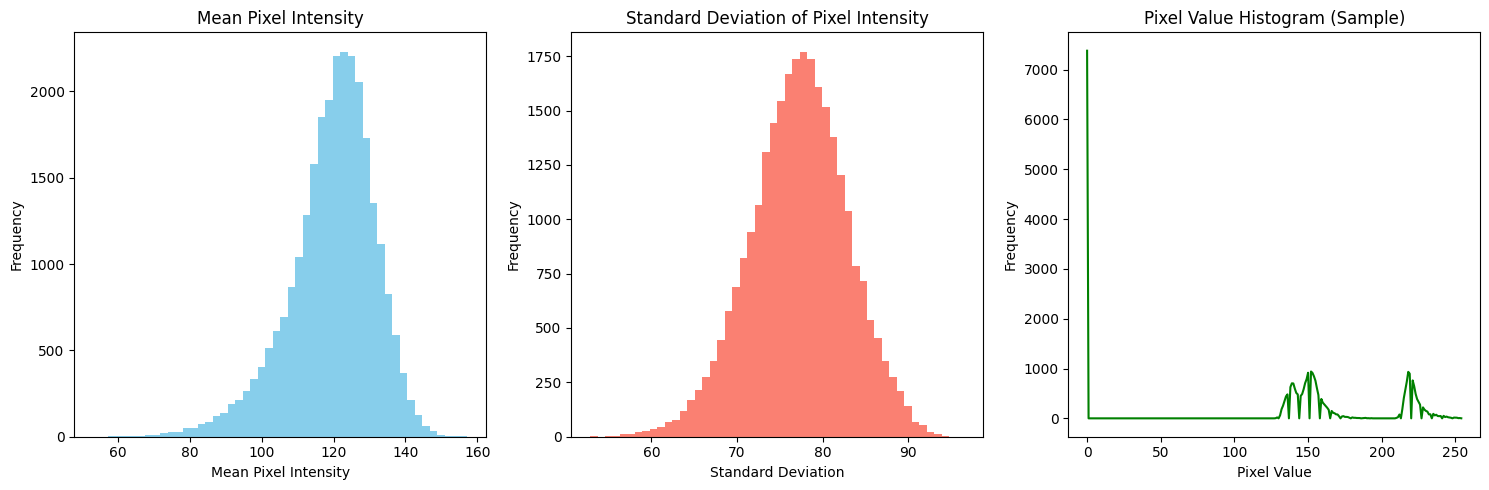

In [ ]:
# Image Statistics
def image_statistics(dataset):
    pixel_means = []
    pixel_stds = []
    pixel_histograms = []

    for sample in dataset:
        image = sample['image'].numpy()
        pixel_means.append(np.mean(image))
        pixel_stds.append(np.std(image))
        pixel_histograms.append(np.histogram(image.flatten(), bins=255)[0])

    pixel_means = np.array(pixel_means)
    pixel_stds = np.array(pixel_stds)
    pixel_histograms = np.array(pixel_histograms)

    # Plot image statistics
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Mean Pixel Intensity')
    plt.hist(pixel_means, bins=50, color='skyblue')
    plt.xlabel('Mean Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.title('Standard Deviation of Pixel Intensity')
    plt.hist(pixel_stds, bins=50, color='salmon')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.title('Pixel Value Histogram (Sample)')
    plt.plot(pixel_histograms[0], color='green')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

print("\nImage Statistics:")
image_statistics(dataset)


Data Augmentation:


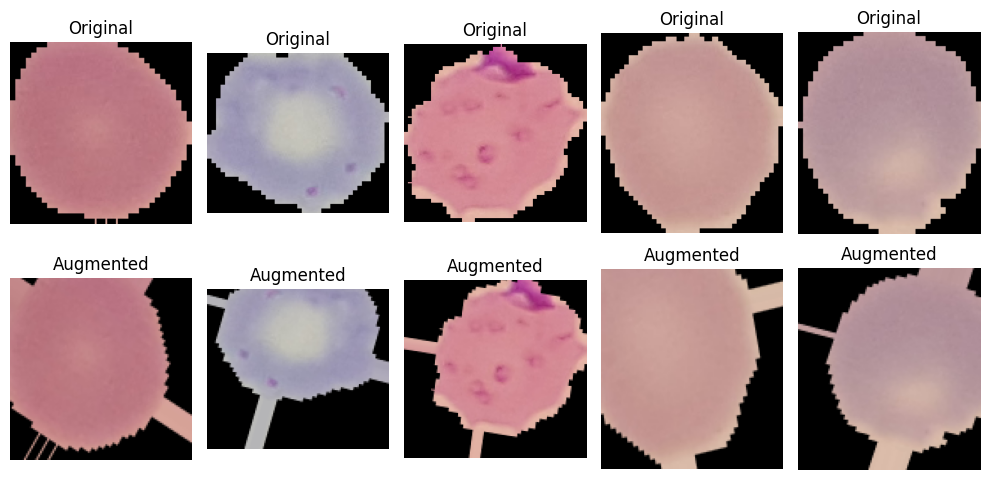

In [ ]:
# Data Augmentation
def visualize_data_augmentation(dataset, num_samples=5):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    plt.figure(figsize=(10, 5))
    i = 0
    for sample in dataset.take(num_samples):
        image = sample['image']
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image.numpy())
        plt.title('Original')
        plt.axis('off')

        image_array = np.expand_dims(image, axis=0)
        for batch in datagen.flow(image_array, batch_size=1):
            plt.subplot(2, num_samples, i + num_samples + 1)
            plt.imshow(batch[0].astype('uint8'))
            plt.title('Augmented')
            plt.axis('off')
            break
        i += 1

    plt.tight_layout()
    plt.show()

print("\nData Augmentation:")
visualize_data_augmentation(dataset)